In [2]:
%load_ext autoreload
%autoreload 2

In [12]:
import popoff
import loadpaths
from linear_model import PoolAcrossSessions, MultiSessionModel

from Session import SessionLite

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [13]:
params = {'legend.fontsize': 'xx-large',
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}

plt.rc("axes.spines", top=False, right=False) # despine

plt.rcParams.update(params)

COLORS = [
'#228E5E', # Hit green
'#DB3713', # Miss red
]

In [41]:
# What region to keep cells from
region = 's1'
# Do you want to remove all cells that were ever targetted from all future analysis?
remove_targets = False
# Do you want to just analyse the three 'training set' sessions ([0,3,7]) indexes hardcoded
# as keep_sessions variable in PoolAcrossSessions
subsample_sessions = True
# Set hits with first lick < 250ms as toosoon?
remove_toosoon = True
# Build the MultiSessionModel object
msm = MultiSessionModel(remove_targets=remove_targets, subsample_sessions=subsample_sessions,
                         remove_toosoon = remove_toosoon)
msm.sessions

{3: instance Mouse J064, run 10 of Session class,
 7: instance Mouse RL070, run 29 of Session class,
 0: instance Mouse J065, run 10 of Session class}

In [ ]:
msm.single_covariate(region=region)
plt.ylabel('Balanced Accuracy Score')

In [ ]:
msm.plot_betas(region='s1')

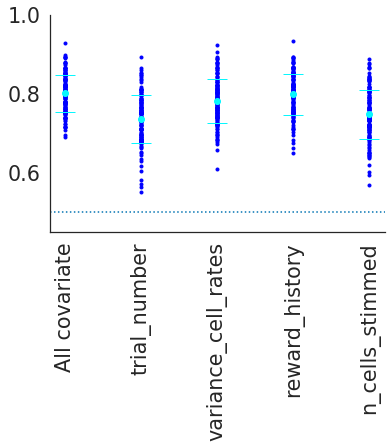

In [48]:
msm.dropout(region='s1')

In [ ]:
# Correlate variables to see what largest sv actually does
X, y = msm.across_session_covariates()

In [ ]:
cov_a = 'ts_s1_pre'
cov_b = 'variance_pre'
plt.plot(X[cov_a], X[cov_b], ".")
plt.xlabel(cov_a)
plt.ylabel(cov_b)
slope, intercept, r_value, p_value, std_err = stats.linregress(X[cov_a], X[cov_b])

In [47]:
x = np.array(['.', '.', 1, '.'])

non_empty = np.where(x == '.')[0]

if len(non_empty > 0):
    overweight_val = x[non_empty]
    x[:] = overweight_val

In [49]:
x

array(['2', '2', '2', '2'], dtype='<U1')

In [44]:
if non_empty:
    print("hi")

/home/jrowland/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """Entry point for launching an IPython kernel.
